In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(3, activation="softmax"))

In [2]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 173056)            0

In [4]:
import os

train_data = []
test_data = []

path = "prospace_assignment_manual_split"

labels = os.listdir(path)

for label in labels:
    grp = os.listdir(os.path.join(path, label))
    l = len(grp)
    split = int(l * 0.8)
    for file in grp[:split]:
        train_data.append((file, label))
    for file in grp[split:]:
        test_data.append((file, label))

In [5]:
import shutil

for file, label in train_data:
    src = os.path.join(path, label, file)
    dst = os.path.join('train_manual_split', str(label), file)
    shutil.copyfile(src, dst)

In [7]:
import shutil

for file, label in test_data:
    src = os.path.join(path, label, file)
    dst = os.path.join('test_manual_split', str(label), file)
    shutil.copyfile(src, dst)

In [8]:
from keras.preprocessing.image import ImageDataGenerator

In [9]:
train_datagen = ImageDataGenerator(
        rescale=1 / 255.0,
        rotation_range=20,
        zoom_range=0.05,
        width_shift_range=0.05,
        height_shift_range=0.05,
        shear_range=0.05,
        horizontal_flip=True,
        fill_mode="nearest")

test_datagen = ImageDataGenerator(rescale=1 / 255.0)

train_generator = train_datagen.flow_from_directory(
    directory=r"./train_manual_split/",
    target_size=(224, 224),
    color_mode="rgb",
    batch_size=32,
    class_mode="categorical",
    shuffle=True,
    subset='training',
    seed=22
)

test_generator = test_datagen.flow_from_directory(
    directory=r"./test_manual_split/",
    target_size=(224, 224),
    color_mode="rgb",
    batch_size=32,
    class_mode="categorical",
    shuffle=True,
    seed=22
)

Found 5451 images belonging to 3 classes.
Found 1365 images belonging to 3 classes.


In [10]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [ ]:
# from PIL import Image

# for folder in os.listdir("prospace_assignment_manual_split"):
#     for file in os.listdir(os.path.join('prospace_assignment_manual_split', folder)):
#         im = Image.open(os.path.join('prospace_assignment_manual_split', folder, file))
#         print(im.size)

In [11]:
# x= train_generator.next()
# print(x[0].shape)

(32, 224, 224, 3)


In [20]:
from keras.callbacks import ModelCheckpoint

filepath = 'my_best_model.hdf5'
checkpoint = ModelCheckpoint(filepath=filepath, 
                             monitor='val_accuracy',
                             verbose=1, 
                             save_best_only=True,
                             mode='max')

In [21]:
callbacks = [checkpoint]

history = model.fit(train_generator, validation_data=test_generator, epochs=5, callbacks=callbacks)

171/171 [==============================] - ETA: 0s - loss: 0.5644 - accuracy: 0.7668
Epoch 1: val_accuracy improved from inf to 0.80659, saving model to my_best_model.hdf5
171/171 [==============================] - 178s 1s/step - loss: 0.5644 - accuracy: 0.7668 - val_loss: 0.4957 - val_accuracy: 0.8066


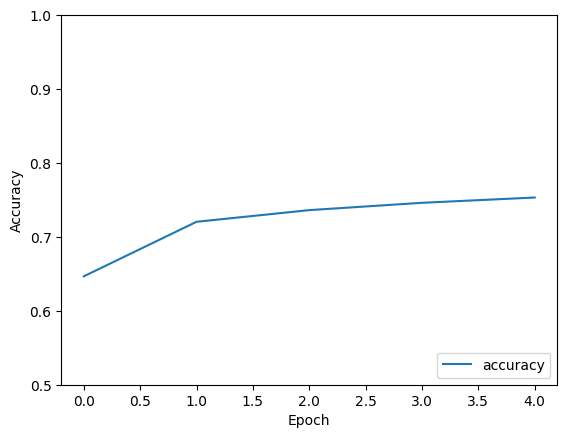

In [16]:
plt.plot(history.history['accuracy'], label='accuracy')
# plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [ ]:
# model.load_weights('./RAHUL_AI_model')

In [17]:
scores = model.evaluate_generator(test_generator)
scores

C:\Users\vinur\AppData\Local\Temp\ipykernel_9776\2978795028.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  scores = model.evaluate_generator(test_generator)


[0.5201724767684937, 0.79340660572052]

In [18]:
model.save_weights('./RAHUL_AI_model_manual_split')